## Taller final 1er Corte 

Mercado de divisas 24/sep/2011 -- 24/sep/2021



In [ ]:
!pip install fsspec
!pip install beautifulsoup4

     |████████████████████████████████| 123 kB 30.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D  

import requests                         
from bs4 import BeautifulSoup            
from sklearn.decomposition import PCA   

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/raleo-pin/deep/main/primer_corte/taller_final/JPY%3DX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-26,76.510002,76.751999,76.230003,76.540001,76.540001,0.0
1,2011-09-27,76.320000,76.690002,76.260002,76.335999,76.335999,0.0
2,2011-09-28,76.820999,76.853996,76.309998,76.807999,76.807999,0.0
3,2011-09-29,76.549004,76.947998,76.411003,76.540001,76.540001,0.0
4,2011-09-30,76.750000,77.129997,76.501999,76.764999,76.764999,0.0


In [ ]:
df.shape

(2610, 7)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2610 non-null   object 
 1   Open       2586 non-null   float64
 2   High       2586 non-null   float64
 3   Low        2586 non-null   float64
 4   Close      2586 non-null   float64
 5   Adj Close  2586 non-null   float64
 6   Volume     2586 non-null   float64
dtypes: float64(6), object(1)
memory usage: 142.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.0
mean,105.128692,105.451332,104.783034,105.127369,105.127369,0.0
std,11.821630,11.852569,11.789856,11.820824,11.820824,0.0
min,75.750000,75.973999,75.570000,75.739998,75.739998,0.0
25%,101.906750,102.184500,101.582000,101.900752,101.900752,0.0
50%,108.369503,108.620998,108.021004,108.362999,108.362999,0.0
75%,111.757751,112.041499,111.404000,111.772251,111.772251,0.0
max,125.601997,125.821999,124.970001,125.628998,125.628998,0.0


In [ ]:
df.isnull().sum()


Date          0
Open         24
High         24
Low          24
Close        24
Adj Close    24
Volume       24
dtype: int64

In [ ]:
df = df.dropna()   # Se eliminan filas que tengan valor NaN.
df = df.reset_index(drop=True) #Se reacomoda las filas en los espacios vacios para optimizacion de la memoria


In [ ]:
df['Date']=pd.to_datetime(df['Date'])       # Convertimos el campo DATE en tipo fecha
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-26,76.510002,76.751999,76.230003,76.540001,76.540001,0.0
1,2011-09-27,76.320000,76.690002,76.260002,76.335999,76.335999,0.0
2,2011-09-28,76.820999,76.853996,76.309998,76.807999,76.807999,0.0
3,2011-09-29,76.549004,76.947998,76.411003,76.540001,76.540001,0.0
4,2011-09-30,76.750000,77.129997,76.501999,76.764999,76.764999,0.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2586 non-null   datetime64[ns]
 1   Open       2586 non-null   float64       
 2   High       2586 non-null   float64       
 3   Low        2586 non-null   float64       
 4   Close      2586 non-null   float64       
 5   Adj Close  2586 non-null   float64       
 6   Volume     2586 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.5 KB


,Open,High,Low,Close,Adj Close,Volume
count,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.0
mean,105.128692,105.451332,104.783034,105.127369,105.127369,0.0
std,11.821630,11.852569,11.789856,11.820824,11.820824,0.0
min,75.750000,75.973999,75.570000,75.739998,75.739998,0.0
25%,101.906750,102.184500,101.582000,101.900752,101.900752,0.0
50%,108.369503,108.620998,108.021004,108.362999,108.362999,0.0
75%,111.757751,112.041499,111.404000,111.772251,111.772251,0.0
max,125.601997,125.821999,124.970001,125.628998,125.628998,0.0


In [ ]:
df = df[['Date','Low', 'Close']]
df.head(10)

,Date,Low,Close
0,2011-09-26,76.230003,76.540001
1,2011-09-27,76.260002,76.335999
2,2011-09-28,76.309998,76.807999
3,2011-09-29,76.411003,76.540001
4,2011-09-30,76.501999,76.764999
5,2011-10-03,76.519997,77.190002
6,2011-10-04,76.510002,76.592003
7,2011-10-05,76.610001,76.760002
8,2011-10-06,76.570000,76.781998
9,2011-10-07,76.580002,76.657997


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df_week = df.resample('W', on='Date').sum()
df_week.head()

,Low,Close
Date,,
2011-10-02,381.713005,382.988999
2011-10-09,382.790002,383.982002
2011-10-16,383.022004,384.156998
2011-10-23,382.510002,384.488006
2011-10-30,378.821007,380.565002


In [ ]:
def plot_stock(symbol, df_acciones=df):
    df_acciones[symbol].plot(alpha=0.9);

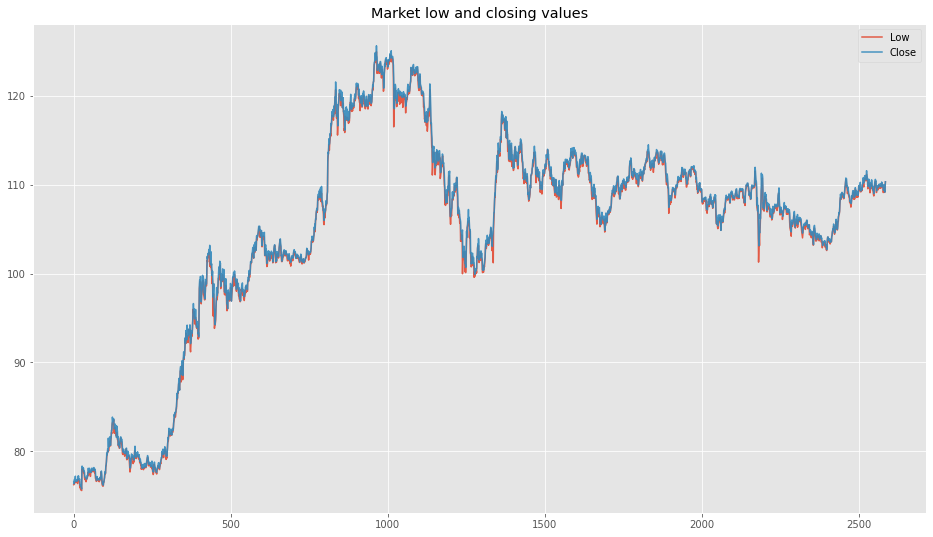

In [ ]:
plot_stock('Low')
plot_stock('Close')
plt.title('Market low and closing values')
plt.legend();

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) 

In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:  'Close', 2: 'Volum'})

In [ ]:
df_escalado.head()
df_escalado.isnull().sum()

Close    0
1        0
dtype: int64

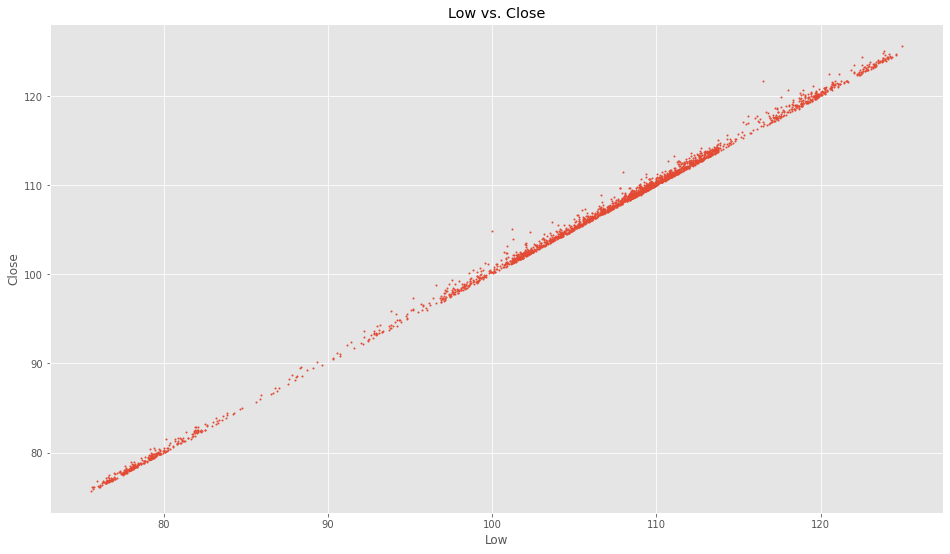

In [ ]:
x = df['Low'].values
y = df['Close'].values
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('Low vs. Close')
plt.plot(x,y,'o',markersize=1)

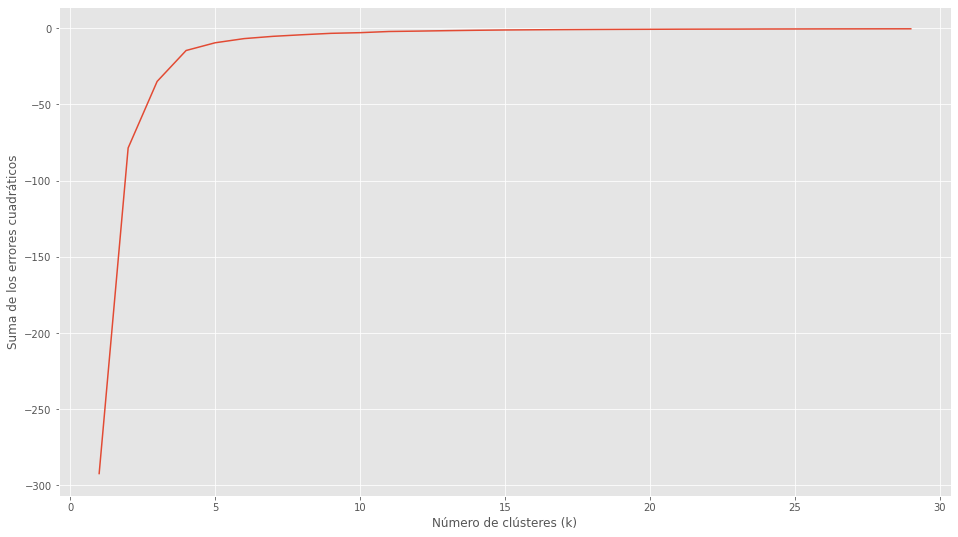

In [ ]:
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [ ]:
kmeans = KMeans(n_clusters=6).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.73711884 0.73338928]
 [0.07277328 0.07369069]
 [0.54994058 0.54809403]
 [0.90011777 0.89655416]
 [0.41192677 0.41362054]
 [0.65999979 0.65646442]]


In [ ]:
labels = kmeans.predict(df_escalado)  
df['label'] = labels                   

df.insert(0, 'Date', dates)

In [ ]:
df.head()

,Date,Low,Close,label
0,2011-09-26,76.230003,76.540001,1
1,2011-09-27,76.260002,76.335999,1
2,2011-09-28,76.309998,76.807999,1
3,2011-09-29,76.411003,76.540001,1
4,2011-09-30,76.501999,76.764999,1


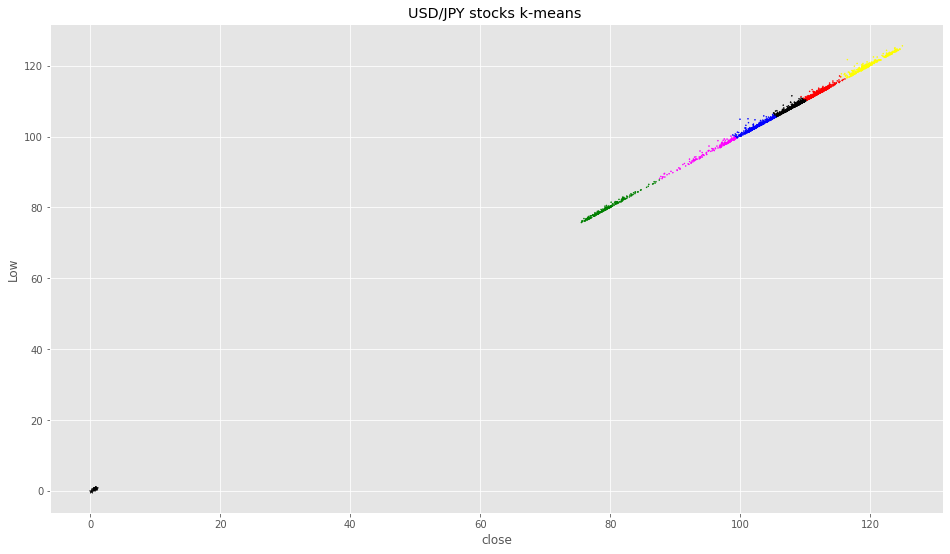

In [ ]:
colores=['red','green','blue','yellow','fuchsia','black']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('close')
plt.ylabel('Low')
plt.title('USD/JPY stocks k-means ')
plt.show()

In [ ]:
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [ ]:
f1 = df['Low'].values
f2 = df['Close'].values

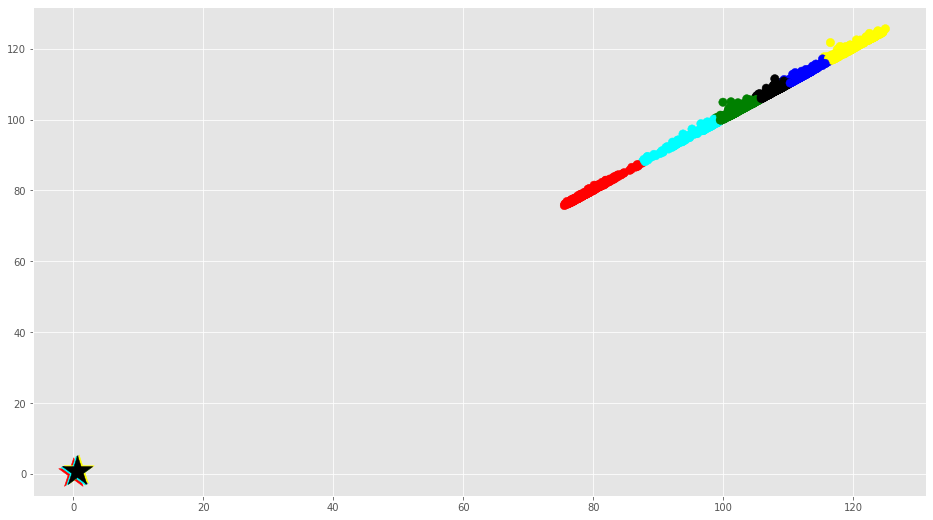

In [ ]:
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

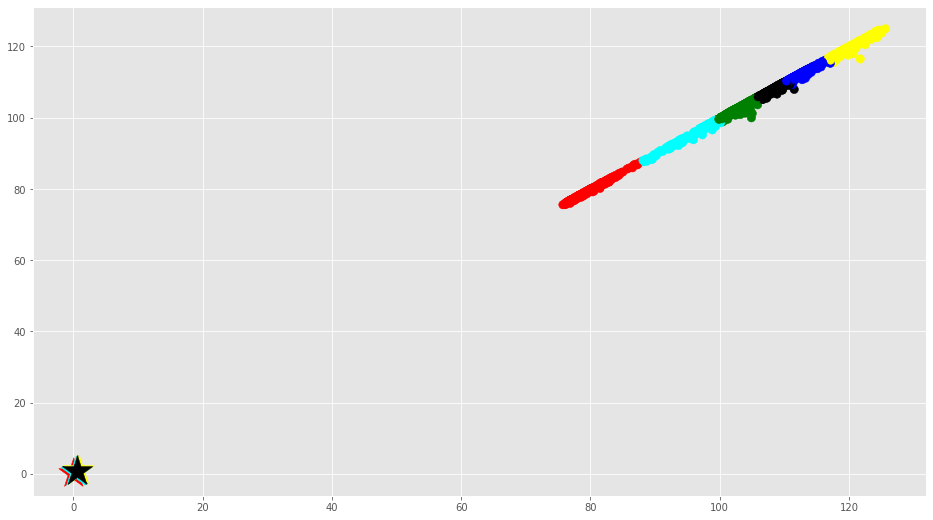

In [ ]:
plt.scatter(f2, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['Low']=df['Low'].values
copy['Close']=df['Close'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,525
1,red,337
2,green,489
3,yellow,334
4,cyan,186
5,black,715
